---
### 6.6.1 最大流问题
#### 1. 基本概念
- 发点 (源) $v_s$

- 收点 (汇) $v_t$

- 弧的容量 $c_{ij}$

- 网络 $D=(V, A, C)$，其中 $C=\left\{c_{ij}\right\}$

- 弧的流量 $f_{ij}$

- 网络上的流 $f=\left\{f_{ij}\right\}$
   
满足**容量限制条件**和**平衡条件**的流成为可行流，可行流总是存在的 (例如零流)
   
最大流问题可以写为如下的线性规划模型
$$
\begin{align*}
&\max v,\\
&{\rm s.t.}
	\begin{cases}
	\sum\limits_{j:\left(v_s,v_j\right)\in A}f_{sj}=v,\\
	\sum\limits_{j:\left(v_i,v_j\right)\in A}f_{ij}-\sum\limits_{k:\left(v_k,v_i\right)\in A}f_{ki}=0,\quad i\neq s,t,\\
	\sum\limits_{k:\left(v_k,v_t\right)\in A}f_{kt}=v,\\
	0\leq f_{ij}\leq c_{ij},\quad \forall \left(v_i, v_j\right)\in A.
	\end{cases}
\end{align*}
$$
其中 $v$ 为这个可行流 (最大流) 的流量，即发点的净输出量

给定一个可行流 $f=\left\{f_{ij}\right\}$，

- 饱和弧：$f_{ij}=c_{ij}$ 
 
- 非饱和弧： $f_{ij}<c_{ij}$
 
- 零流弧：$f_{ij}=0$
 
- 非零流弧：$f_{ij}>0$

若 $\mu$ 是网络中联结发点 $v_s$ 和收点 $v_t$ 的一条路，定义路的方向为从 $v_s$ 到 $v_t$，则路上与路的方向一致的弧称为前向弧，反之成为后向弧。前向弧的全体记为 $u^+$ ，后向弧的全体记为 $u^-$

设 $f$ 是一个可行流，$\mu$ 是从发点到收点的一条路，若 $\mu$ 满足：前向弧是非饱和弧，后向弧是非零流弧，则称 $\mu$ 为关于可行流 $f$ 的一条增广路

#### 2. 寻求最大流的标号法 (Ford-Fulkerson)
从 $v_s$ 到 $v_t$ 的一个可行流出发 (可以是零流)，经过标号过程和调整过程，即可求得从 $v_s$ 到 $v_t$ 的最大流

#### 3. 用 NetworkX 求网络最大流

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
L = [(1,2,6),(1,3,4),(1,4,5),(2,3,3),(2,5,9),(2,6,9),
    (3,4,5),(3,5,6),(3,6,7),(3,7,3),(4,3,2),(4,7,5),
    (5,8,12),(6,5,8),(6,8,10),(7,6,4),(7,8,15)]
G = nx.DiGraph()
G.add_nodes_from(range(1,9))
G.add_weighted_edges_from(L, weight='capacity')
rof, flow_dict = nx.maximum_flow(G, 1, 8)
print("最大流的流量为：", rof); print("最大流为：\n", flow_dict)

最大流的流量为： 15
最大流为：
 {1: {2: 6, 3: 4, 4: 5}, 2: {3: 0, 5: 6, 6: 0}, 3: {4: 0, 5: 4, 6: 0, 7: 0}, 4: {3: 0, 7: 5}, 5: {8: 10}, 6: {5: 0, 8: 0}, 7: {6: 0, 8: 5}, 8: {}}


In [3]:
n = len(flow_dict)
adj_mat = np.zeros((n,n), dtype=int)
for i, adj in flow_dict.items():
    for j, f in adj.items():
        adj_mat[i-1, j-1] = f
print("最大流的邻接矩阵为：\n", adj_mat)
ni, nj = np.nonzero(adj_mat)

最大流的邻接矩阵为：
 [[ 0  6  4  5  0  0  0  0]
 [ 0  0  0  0  6  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0]]


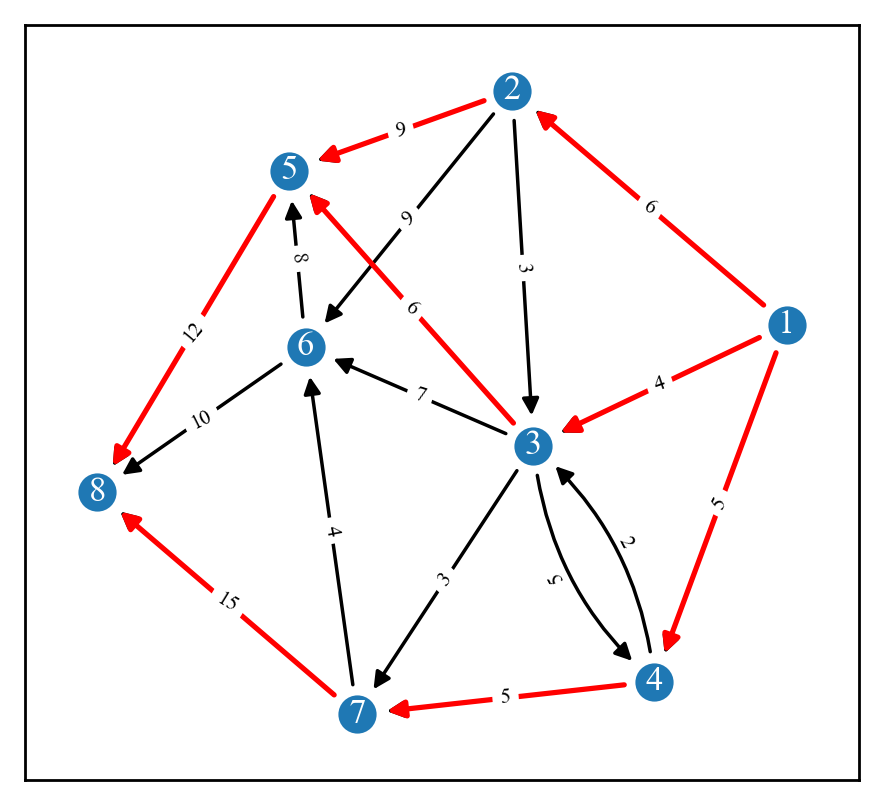

In [4]:
fig = plt.figure(dpi=250)
ax = fig.add_subplot(111)
pos = nx.spectral_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_labels(G, pos, font_color='w', font_size=10)

w = nx.get_edge_attributes(G, 'capacity')
dw = {(3,4): w[(3,4)], (4,3): w[(4,3)]}
del w[(3,4)]; del w[(4,3)]
nx.draw_networkx_edges(G, pos, edgelist=w)
nx.draw_networkx_edges(G, pos, edgelist=dw, connectionstyle='arc3, rad = 0.2')
path_edges = list(zip(ni+1, nj+1))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=1.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=w, font_size=6, label_pos=0.5)
ax.text(0.3,-0.5, '5', fontsize=6, rotation=180-63)
ax.text(0.5,-0.4, '2', fontsize=6, rotation=-63)
ax.set_aspect(1)

#### 多对多招聘问题
多源多汇，需引入虚拟源点 $v_s$ 和虚拟汇点 $v_t$ 

公司 $2,3,4$ 对来源有特殊要求，需引入 $3$ 个虚拟的中间点 $2',3',4'$
1. 利用 NetworkX 求解

In [5]:
import numpy as np
import networkx as nx

node = ['s','A','B','C','D','E','2b','3b','4b','1','2','3','4','t']
L = [('s','A',4),('s','B',3),('s','C',3),('s','D',2),('s','E',4),('A','2b',1),
    ('A','1',1),('A','3b',1),('A','4b',1),('B','2b',1),('B','1',1),('B','3',1),
    ('B','4b',1),('C','1',1),('C','2',1),('C','3',1),('C','4b',1),('D','1',1),
    ('D','2',1),('D','3b',1),('D','4b',1),('E','2b',1),('E','1',1),('E','3',1),
    ('E','4',1),('2b','2',2),('3b','3',1),('4b','4',2),('1','t',5),('2','t',4),
    ('3','t',4),('4','t',3)]
G = nx.DiGraph()
G.add_nodes_from(node)
for i in range(len(L)):
    G.add_edge(L[i][0], L[i][1], capacity=L[i][2])
rof, flow_dict = nx.maximum_flow(G, 's', 't')
print("最大流的流量为：", rof); print("\n最大流为：\n", flow_dict)

# 从字典中提取邻接矩阵范式
node = list(G.nodes())
n = len(node)
A = np.zeros((n,n), dtype=int)
for i, adj in flow_dict.items():
    for j, f in adj.items():
        A[node.index(i), node.index(j)] = f
print("\n最大流的邻接矩阵\n", A)

最大流的流量为： 16

最大流为：
 {'s': {'A': 4, 'B': 3, 'C': 3, 'D': 2, 'E': 4}, 'A': {'2b': 1, '1': 1, '3b': 1, '4b': 1}, 'B': {'2b': 0, '1': 1, '3': 1, '4b': 1}, 'C': {'1': 1, '2': 1, '3': 1, '4b': 0}, 'D': {'1': 1, '2': 1, '3b': 0, '4b': 0}, 'E': {'2b': 1, '1': 1, '3': 1, '4': 1}, '2b': {'2': 2}, '3b': {'3': 1}, '4b': {'4': 2}, '1': {'t': 5}, '2': {'t': 4}, '3': {'t': 4}, '4': {'t': 3}, 't': {}}

最大流的邻接矩阵
 [[0 4 3 3 2 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


2. 利用 0-1 整数规划模型求解

In [6]:
import cvxpy as cp
import numpy as np

a = np.array([4, 3, 3, 2, 4])
x = cp.Variable((4, 5), boolean=True)
obj = cp.Maximize(cp.sum(x))
cons = [
    cp.sum(x, axis=0) <= a,
    x[1,0] + x[1,1] + x[1,4] <= 2,
    x[2,0] + x[2,3] <= 1,
    x[3,0] + x[3,1] + x[3,2] + x[3,3] <= 2,
]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：\n{x.value}'); print(f'最优值为：{prob.value}')

最优解为：
[[1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1.]]
最优值为：16.0


### 6.6.2 最小费用流问题
设 $f_{ij}$ 为弧 $\left(v_i,v_j\right)$ 上的流量，$b_{ij}$ 为弧 $\left(v_i,v_j\right)$ 上的单位费用，$c_{ij}$ 为弧上的容量，则最小费用流问题可以用如下的线性规划问题描述：
$$
\begin{align*}
&\min\sum\limits_{\left(v_i,v_j\right)\in A}b_{ij}f_{ij},\\
&{\rm s.t.}
	\begin{cases}
	\sum\limits_{\left(v_s,v_j\right)\in A}f_{sj}=v,\\
	\sum\limits_{j:\left(v_i,v_j\right)\in A}f_{ij}-\sum\limits_{k:\left(v_i,v_j\right)\in A}f_{kj}=0,\quad i\neq s,t,\\
	\sum\limits_{k:\left(v_k,v_t\right)\in A}f_{kt}=v,\\
	0\leq f_{ij}\leq c_{ij},\quad\forall\left(v_i,v_j\right)\in A.
    \end{cases}
\end{align*}
$$
当 $v=v_{\max}$ 时，本问题就是最小费用最大流问题

#### 迭代法求最小费用流 (Busacker & Gowan)
#### 运费网络模型

In [7]:
L = [('vs','v2',5,3),('vs','v3',3,6),('v2','v4',2,8),('v3','v2',1,2),('v3','v5',4,2),
    ('v4','v3',1,1),('v4','v5',3,4),('v4','vt',2,10),('v5','vt',5,2)]
G = nx.DiGraph()
for i in range(len(L)):
    G.add_edge(L[i][0], L[i][1], capacity=L[i][2], weight=L[i][3])
flow_dict = nx.max_flow_min_cost(G, 'vs', 'vt')
min_cost = nx.cost_of_flow(G, flow_dict)

node = list(G.nodes())
n = len(node)
A = np.zeros((n,n), dtype=int)
for i, adj in flow_dict.items():
    for j, f in adj.items():
        A[node.index(i), node.index(j)] = f

print("最小费用最大流为：\n", flow_dict)
print("最小费用为：\n", min_cost)
print("最大流的流量为：\n", sum(A[:, -1]))
print("最小费用最大流的邻接矩阵\n", A)

最小费用最大流为：
 {'vs': {'v2': 2, 'v3': 3}, 'v2': {'v4': 2}, 'v3': {'v2': 0, 'v5': 4}, 'v4': {'v3': 1, 'v5': 1, 'vt': 0}, 'v5': {'vt': 5}, 'vt': {}}
最小费用为：
 63
最大流的流量为：
 5
最小费用最大流的邻接矩阵
 [[0 2 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 4 0]
 [0 0 1 0 1 0]
 [0 0 0 0 0 5]
 [0 0 0 0 0 0]]
